### Ref 
- https://stackoverflow.com/questions/42532386/how-to-work-with-multiple-inputs-for-lstm-in-keras

In [13]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [14]:
# help function 

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        #a = dataset[i:(i + look_back), 0]
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        #### get the target predict col #### 
        dataY.append(dataset[i + look_back, 4])
    return numpy.array(dataX), numpy.array(dataY)


In [15]:
# -------------------  #

In [16]:
# load the dataset
dataframe = pandas.read_csv('table.csv', engine='python') 
dataset = dataframe.values


In [17]:
dataframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [18]:
cols = ['Open', 'High', 'Low','Volume', 'Close']

In [19]:
dataframe_ = dataframe[cols]

In [20]:
dataframe_.head(3)

,Open,High,Low,Volume,Close
0,2052.229980,2055.580078,2047.260010,3055480000,2048.040039
1,2041.880005,2058.350098,2041.880005,3507650000,2052.320068
2,2044.209961,2044.209961,2025.910034,3846770000,2040.040039


In [21]:
# -------------------  #

In [22]:


# load the dataset
#dataframe = pandas.read_csv('datos.csv', engine='python') 
dataset = dataframe_.values

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)  
testX, testY = create_dataset(test, look_back)

In [23]:
# reshape input to be  [samples, time steps, features]
###  need to modify here :
### 3 -> 5 
### numpy.reshape(trainX, (trainX.shape[0], look_back, 5))
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, 5))
testX = numpy.reshape(testX, (testX.shape[0],look_back, 5))

In [24]:
# -------------------  #

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/ipykernel/__main__.py:40: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/ipykernel/__main__.py:40: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 5))`
/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 7495 samples, validate on 3693 samples
Epoch 1/20
7495/7495 [==============================] - 4s 552us/step - loss: 0.1012 - val_loss: 0.0332
Epoch 2/20
7495/7495 [==============================] - 2s 305us/step - loss: 0.0044 - val_loss: 0.0064
Epoch 3/20
7495/7495 [==============================] - 2s 287us/step - loss: 5.8380e-04 - val_loss: 0.0026
Epoch 4/20
7495/7495 [==============================] - 2s 272us/step - loss: 1.8514e-04 - val_loss: 0.0020
Epoch 5/20
7495/7495 [==============================] - 2s 248us/step - loss: 1.4505e-04 - val_loss: 0.0017
Epoch 6/20
7495/7495 [==============================] - 2s 214us/step - loss: 1.3157e-04 - val_loss: 0.0014
Epoch 7/20
7495/7495 [==============================] - 2s 260us/step - loss: 1.2324e-04 - val_loss: 0.0013
Epoch 8/20
7495/7495 [==============================] - 2s 323us/step - loss: 1.1690e-04 - val_loss: 0.0012
Epoch 9/20
7495/7495 [==============================] - 2s 262us/step - loss: 1.1159e-04 - val_l

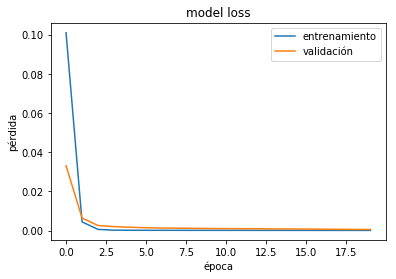

[2039.28745326 2032.52076638 2029.94907757 ...  157.59194607  157.392104
  157.18027486]
Train Score: 32.14 RMSE
Test Score: 67.25 RMSE


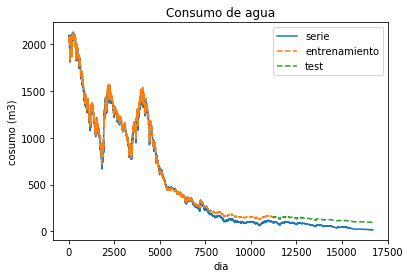

In [25]:
"""
# convert an array of values into a dataset matrix



# fix random seed for reproducibility
numpy.random.seed(7)


# load the dataset
dataframe = pandas.read_csv('datos.csv', engine='python') 
dataset = dataframe.values

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)  
testX, testY = create_dataset(test, look_back)

# reshape input to be  [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, 3))
testX = numpy.reshape(testX, (testX.shape[0],look_back, 3))

"""

# create and fit the LSTM network

model = Sequential()
### need to modify here ###
### look_back = 3 -> 5 ( dim of cols)
#model.add(LSTM(4, input_dim=look_back))
model.add(LSTM(4, input_dim=5))


model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history= model.fit(trainX, trainY,validation_split=0.33, nb_epoch=20, batch_size=32)

# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('pérdida')
plt.xlabel('época')
plt.legend(['entrenamiento', 'validación'], loc='upper right')
plt.show()

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Get something which has as many features as dataset
trainPredict_extended = numpy.zeros((len(trainPredict),5))
# Put the predictions there
trainPredict_extended[:,4] = trainPredict[:,0]

# Inverse transform it and select the 5rd column.
#trainPredict = scaler.inverse_transform(trainPredict_extended) [:,2]  
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,4]

print(trainPredict)
# Get something which has as many features as dataset
testPredict_extended = numpy.zeros((len(testPredict),5))
# Put the predictions there
testPredict_extended[:,4] = testPredict[:,0]
# Inverse transform it and select the 5rd column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,4]   


trainY_extended = numpy.zeros((len(trainY),5))
trainY_extended[:,4]=trainY
trainY=scaler.inverse_transform(trainY_extended)[:,4]


testY_extended = numpy.zeros((len(testY),5))
testY_extended[:,4]=testY
testY=scaler.inverse_transform(testY_extended)[:,4]


# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, 2] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, 2] = testPredict



#plot

serie,=plt.plot(scaler.inverse_transform(dataset)[:,2])  
prediccion_entrenamiento,=plt.plot(trainPredictPlot[:,2],linestyle='--')  
prediccion_test,=plt.plot(testPredictPlot[:,2],linestyle='--')
plt.title('Consumo de agua')
plt.ylabel('cosumo (m3)')
plt.xlabel('dia')
plt.legend([serie,prediccion_entrenamiento,prediccion_test],['serie','entrenamiento','test'], loc='upper right')

In [26]:
model

In [27]:
trainX.shape

(11188, 3, 5)